In [62]:
import pandas as pd
import numpy as np

In [28]:
df=pd.read_csv("F:\str.csv")
df.shape

(199621, 37)

In [148]:
df['ci']=df['15']-df['21']

In [30]:
df=df[df['21']<22]

In [36]:
df['34'].describe()

count    69571.000000
mean       205.547945
std          0.014490
min        205.509893
25%        205.538654
50%        205.548164
75%        205.557439
max        205.584904
Name: 34, dtype: float64

In [39]:
df['d']=((df['1']-5000)**2 +(df['2']-5000)**2)**(0.5)

In [76]:
dini=df[(df['1']>4995) & (df['1']<5005) & (df['2']>4995) & (df['2']<5005)]

In [77]:
rac=dini['34'].mean()     #ra and dec of cluster center

In [78]:
decc=dini['35'].mean()

In [79]:
#calculating angular distance in radians
df['cos']=np.sin(decc)*np.sin(df['35']) +np.cos(decc)*np.cos(df['35'])*np.sin(rac-df['34'])

In [80]:
df['arccos']=np.arccos(df['cos'])

In [132]:
#distance to be used in calculation of abs mag
df['dist']=df['arccos']*5000*np.sqrt(2)
print(df['dist'])

0         10887.580686
1         10873.728412
2         10893.386274
3         10917.825224
4         10858.092713
5         10881.702457
6         10849.052360
7         10950.707001
8         10936.169048
9         10963.166534
10        10854.649031
11        10845.124144
12        10858.547930
13        10935.576258
14        10948.921340
15        10913.663655
16        11002.700227
17        10896.827928
18        10919.356394
19        10993.429848
20        11014.154416
21        10834.742019
22        11005.827168
23        10994.730334
24        10908.823799
25        10862.415151
26        10972.371933
27        10885.939765
28        10924.810269
29        10967.044503
              ...     
199510    11165.039765
199519    11162.590032
199526    11140.551728
199542    11160.193957
199543    11160.032439
199550    11158.788284
199552    11157.627730
199554    11156.616929
199559    11155.749048
199566    11151.835727
199567    11152.397116
199570    11150.050575
199571    1

In [133]:
#calculating absolute magnitude
df['absmag']=df['21']-5*np.log(df['dist']/10)

In [134]:
df['absmag'].describe()

count    69571.000000
mean       -16.076003
std         12.879926
min       -135.149037
25%        -15.419044
50%        -14.520533
75%        -13.772561
max        -12.927040
Name: absmag, dtype: float64

In [154]:
from astropy.modeling.functional_models import Sersic1D
from scipy.integrate import simps
Sersic = Sersic1D(amplitude=1,r_eff=1,n=1)


x = np.array(df['dist'].transpose())
print(x)
I = 2 * np.pi * x * Sersic(x)


integral = [simps(I[0:i],x[0:i]) for i in np.arange(len(I)-1)+1]


from scipy.interpolate import interp1d

f_int = interp1d(integral,np.arange(len(I)-1)+1)
print('Half radius: ', f_int(integral[-1]/2.))

[10887.580686   10873.728412   10893.38627404 ... 11191.51183239
 11169.42840808 11164.92588615]
Half radius:  nan


In [136]:
df['ds']=np.sqrt((df['2']-5000)**2+(df['1']-5000)**2)

In [137]:
df['ds']

0         3801.852316
1         3870.036127
2         3726.697775
3         3591.931024
4         3916.145238
5         3749.781721
6         3948.223910
7         3359.632091
8         3407.003040
9         3283.939539
10        3864.080707
11        3923.336279
12        3810.897402
13        3358.542741
14        3292.173545
15        3441.990587
16        3089.036060
17        3522.918102
18        3394.328151
19        3091.551961
20        3038.262574
21        3917.310314
22        3037.424725
23        3055.797738
24        3412.424414
25        3703.882226
26        3105.204411
27        3534.568193
28        3310.192458
29        3119.961433
             ...     
199510    3408.744126
199519    3396.036731
199526    3248.367231
199542    3399.644317
199543    3344.373135
199550    3292.441031
199552    3349.787612
199554    3380.671181
199559    3349.455436
199566    3341.786844
199567    3269.068559
199570    3312.132496
199571    3317.139426
199572    3304.803279
199578    

In [98]:
r=max(df['ds'])

In [99]:
import math

In [100]:
vol=(4/3)*math.pi*pow(r,3)


In [101]:
no=df.shape[0]

In [102]:
stellardensity=no/vol

In [103]:
print(stellardensity)

2.6269306450884237e-07


In [120]:
df['15'].describe()

count    69571.000000
mean         8.506381
std         37.061908
min        -99.999900
25%         19.790800
50%         21.042400
75%         22.099200
max         28.805000
Name: 15, dtype: float64

In [121]:
dh=df[df['15']>-90]
dh['15'].describe()

count    62311.000000
mean        21.148701
std          1.415371
min         14.176200
25%         20.238750
50%         21.264100
75%         22.206100
max         28.805000
Name: 15, dtype: float64

In [126]:
dh=dh[dh['21']>-90]
dh['absmag'].describe()

count    61902.000000
mean       -14.708504
std          1.234853
min        -22.820703
25%        -15.400001
50%        -14.518205
75%        -13.775955
max        -12.944121
Name: absmag, dtype: float64

In [127]:
y=dh['absmag']
x=dh['ci']
import matplotlib.pyplot as plt
plt.scatter(x,y,s=0.05)

In [139]:
dh['dists']=(   (dh['dist'])/(5000*np.sqrt(2)) )* 10.4 *1000

In [140]:
dh['am']=dh['21']-5*np.log(dh['dists']/10)

In [141]:
dh['am'].describe()

count    61902.000000
mean       -16.637475
std          1.234853
min        -24.749675
25%        -17.328972
50%        -16.447177
75%        -15.704927
max        -14.873092
Name: am, dtype: float64

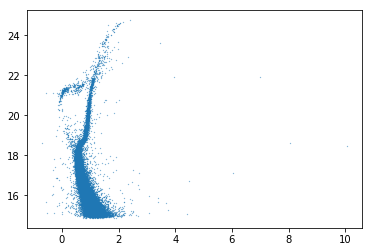

In [152]:
y=dh['am']
x=dh['ci']
import matplotlib.pyplot as plt
plt.scatter(x,-y,s=0.05)